In [1]:
import sys
import pdb
import time
# sys.path.append("C:\\users\\mccar\\miniconda3\\lib\\site-packages")
sys.path.append("C:\\Python310\\Lib\\site-packages")
import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
import numpy as np
import matplotlib.pyplot as plt


C:\Python310\Lib\site-packages\bettermdptools\algorithms\planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.66 seconds


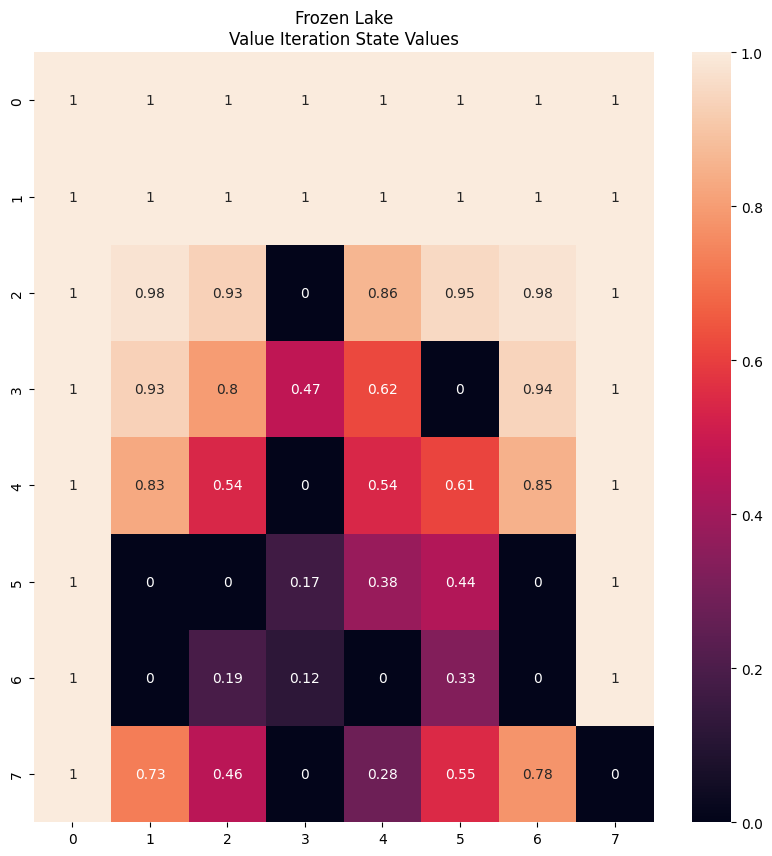

In [2]:
# make gym environment 
frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration()

#plot state values
size=(8,8)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

In [3]:
# Create the Frozen Lake 20x20 environment
import gym # loading the Gym library
 
# env = gym.make('FrozenLake8x8-v1')
# print_env = [[str(env.desc[i][j].decode()) for j in range(8)] for i in range(8)]

desc = [
    "SFFFFFFFFFHHFFFFFFFF",
    "FFFFFFFFFFFFFHHHFFFF",
    "HFFFHFFFFFHFFFFHFFFF",
    "FFFHFFFFFFFFFHFFFFHF",
    "FFFFFHFFFHFFFFFFHFFH",
    "FFFHFFFFFFFFFFFHFFFH",
    "FFFFFFFFHFFFHHFHFFFF",
    "FFHFFFFFFHFFFFHFFFFF",
    "FFHFHFFFFFFHFFFFFFFH",
    "FFFFFHFFFFHFFFFFFFFH",
    "HFFFFFHFFFFFFFFFFFFF",
    "FHFFFFFHFFFHFFFFHFFF",
    "FFFFFFHFFFFFFFFHFFFF",
    "HFHFFHHHFFHHFFFFFFFF",
    "FFFFFFFHFFFFHFFHFFFF",
    "FFHHFFFFFFFFFFFFHFFF",
    "FFFFFFFHHHHFHFFHHFFF",
    "FHFHHFFHFFFFFHFFFFFF",
    "FFFFFHHFHFFFFHFFFFFH",
    "FFFFFFFFFFFFFFFHHFFG",
]

env = gym.make("FrozenLake-v1", desc=desc)
# print(env.desc)
print(env.desc.shape)


(20, 20)


In [14]:
# Value Iteration Frozen Lake Policy Map
gamma_vals = [0.95, 0.99, 0.999, 1]

def value_iteration(env, epsilon=1e-3, num_iterations=1):
    """
    Value iteration algorithm for the given environment.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    orig_start_time = time.time()  # Start time for the algorithm
    
    
    rewards_per_iteration_list = []
    deltas_per_iteration_list = []
    times_per_iteration_list = []
    Vs = []
    
    for gamma_val in gamma_vals:
        rewards_gamma = []
        deltas_gamma = []
        times_gamma = []
        
        for _ in range(num_iterations):
            # Initialize the value function
            this_iter = 0
            V = np.zeros(num_states)
            
            
            rewards_per_iteration = []
            deltas_per_iteration = []
            times_per_iteration = []
            policy = np.zeros(env.observation_space.n, dtype=int)
            
            while True:
                delta = 0
                start_time = time.time()  # Start time for the current iteration
                orig_policy = policy
                for s in range(num_states):
                    v_orig = V[s]
                    # Update the value function using Bellman optimality equation
                    Q_s = np.zeros(num_actions)
                    for a in range(num_actions):
                        for prob, next_state, reward, _ in env.P[s][a]:
                            Q_s[a] += prob * (reward + gamma_val * V[next_state])
                    V[s] = np.max(Q_s)
                    delta = max(delta, abs(v_orig - V[s]))
                
                end_time = time.time()  # End time for the current iteration
                iteration_time = end_time - start_time  # Time taken for the current iteration
                
                rewards_per_iteration.append(np.mean(V))  # Average reward for the current iteration
                deltas_per_iteration.append(delta)  # Delta for the current iteration
                times_per_iteration.append(iteration_time)  # Time for the current iteration

                # policy = np.zeros(env.observation_space.n, dtype=int)
                # for state in range(env.observation_space.n):
                #     action_values = [sum(prob * (reward + gma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
                #     policy[state] = np.argmax(action_values)
                
                this_iter += 1
                # if np.array_equal(policy, orig_policy):
                #     print("no policy change")
                #     print(f"Converged for gamma = {gamma_val} after {this_iter} iterations")
                #     print(f"Time taken for gamma = {gamma_val}: {time.time() - start_time}")
                #     break

                if delta < epsilon:
                    print(f"Converged for gamma = {gamma_val} after {this_iter} iterations")
                    print(f"Time taken for gamma = {gamma_val}: {time.time() - start_time}")
                    break
            
            rewards_gamma.append(rewards_per_iteration)
            deltas_gamma.append(deltas_per_iteration)
            times_gamma.append(times_per_iteration)
            Vs.append(V)
        
        rewards_per_iteration_list.append(rewards_gamma)
        deltas_per_iteration_list.append(deltas_gamma)
        times_per_iteration_list.append(times_gamma)
    
    results_dict = {
        'rewards': rewards_per_iteration_list,
        'deltas': deltas_per_iteration_list,
        'times': times_per_iteration_list,
        'V': Vs
    }
    # total time in seconds
    print(f"Total time taken: ", time.time() - orig_start_time)
    return results_dict

results_dict = value_iteration(env)

Converged for gamma = 0.95 after 39 iterations
Time taken for gamma = 0.95: 0.015625
Converged for gamma = 0.99 after 94 iterations
Time taken for gamma = 0.99: 0.015624284744262695
Converged for gamma = 0.999 after 240 iterations
Time taken for gamma = 0.999: 0.016697168350219727
Total time taken:  3.2016921043395996


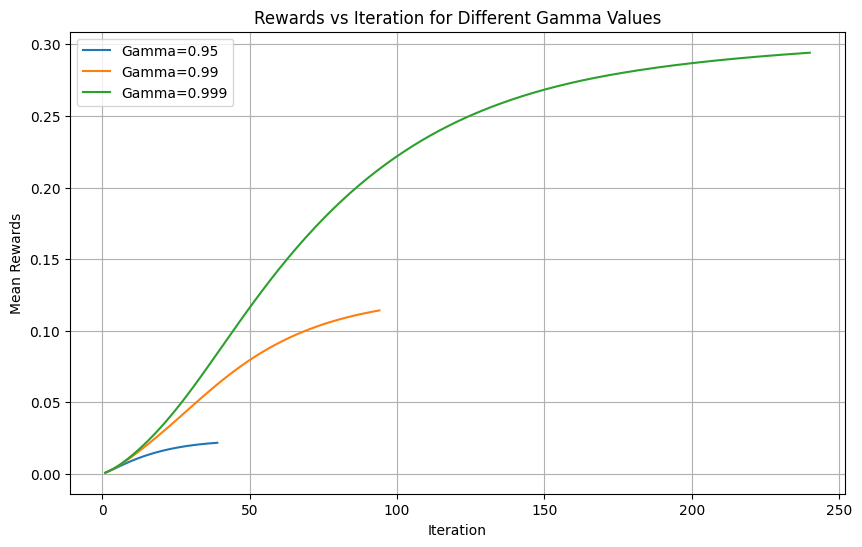

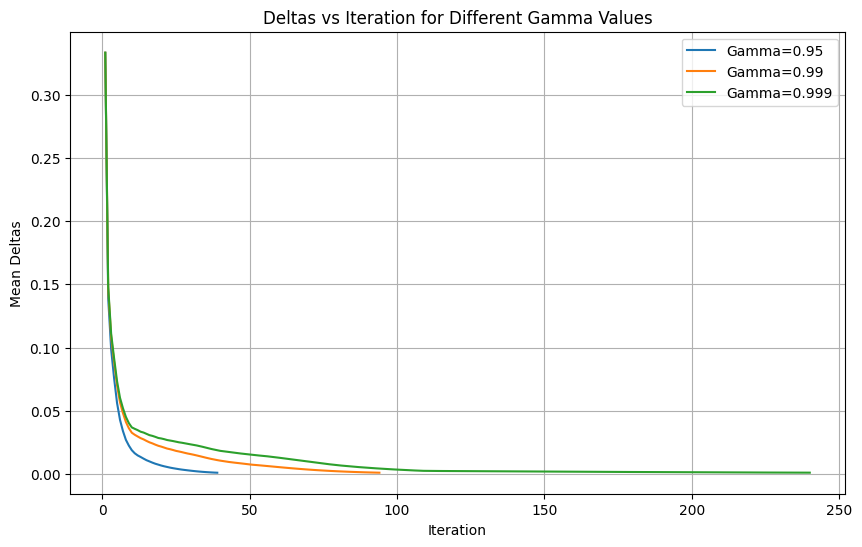

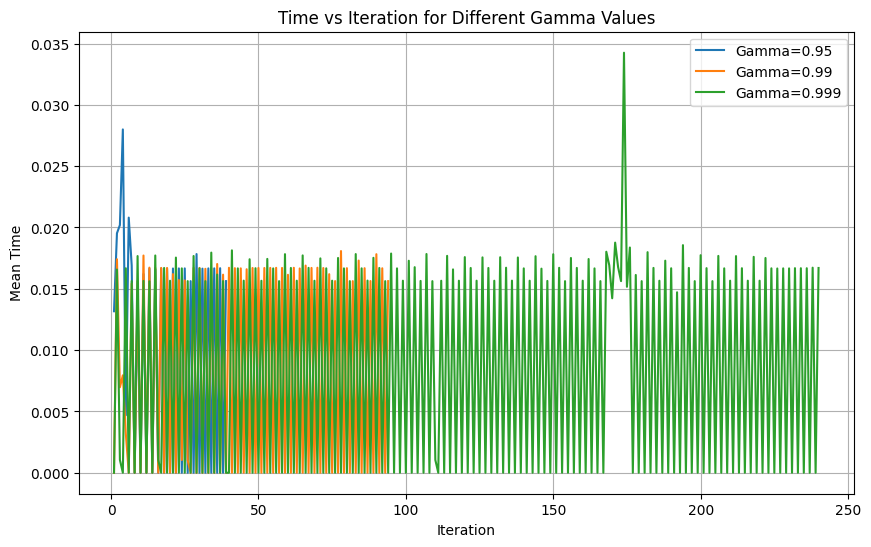

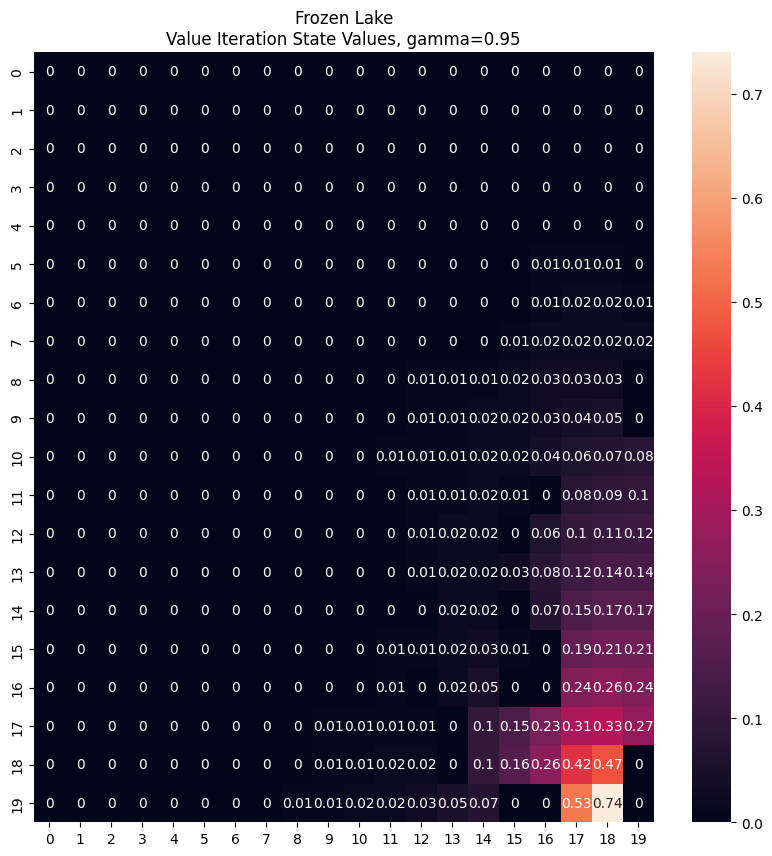

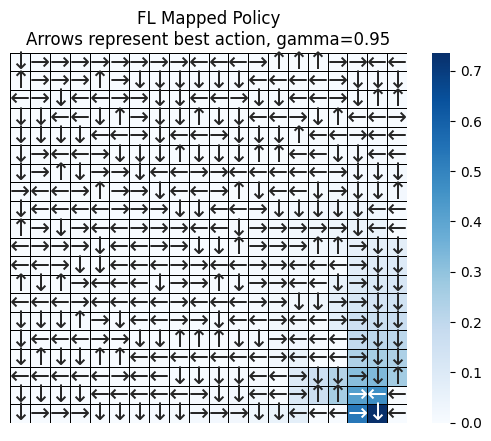

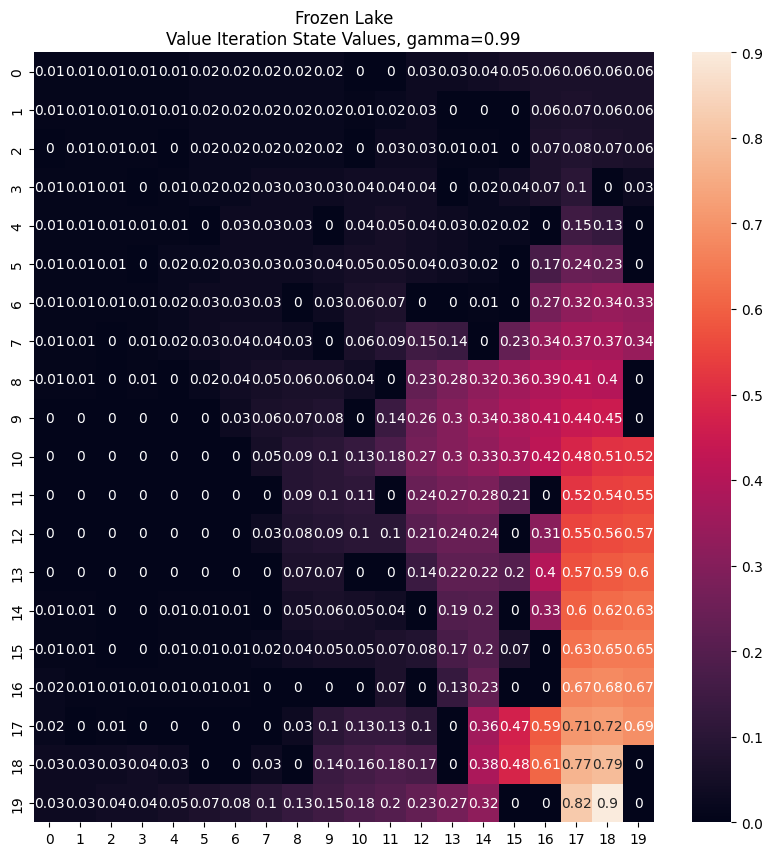

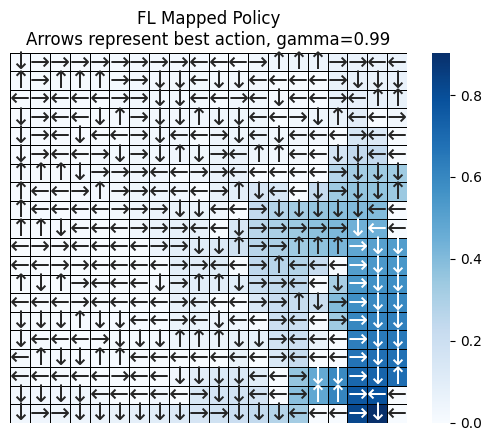

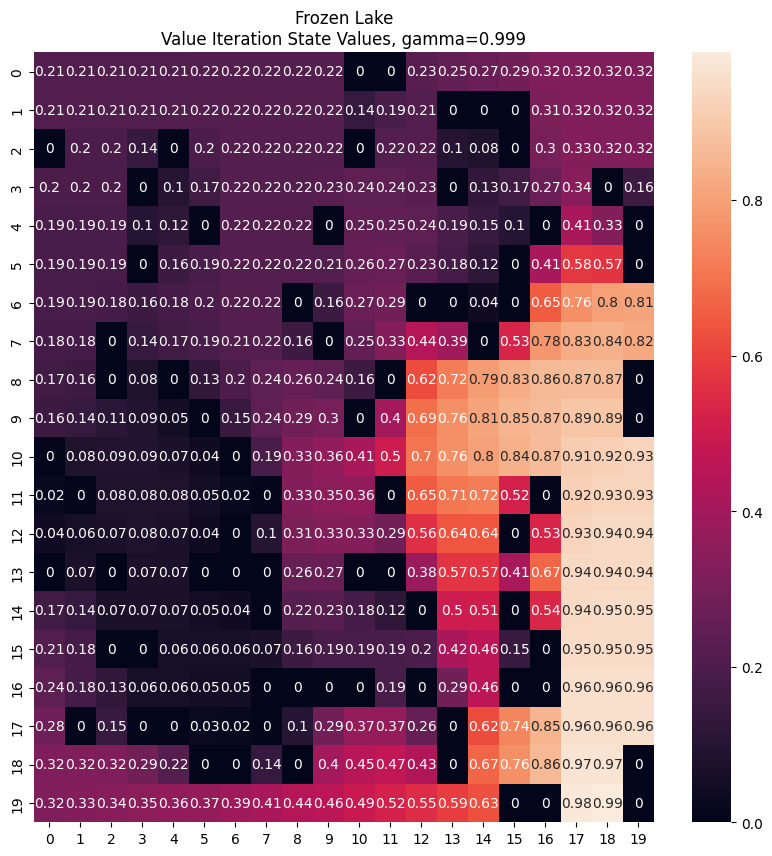

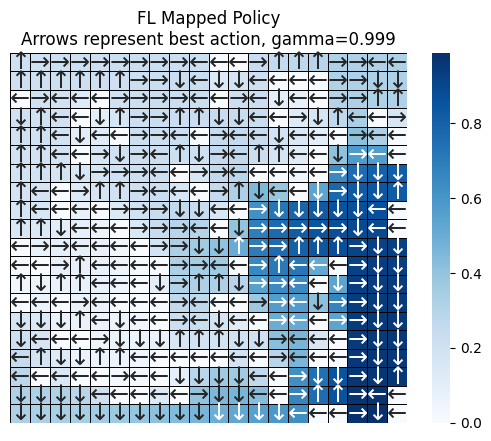

In [15]:
# Extract rewards data for each gamma value
rewards_data = results_dict['rewards']
deltas_data = results_dict['deltas']
times_data = results_dict['times']
# print(rewards_data[0][2])

# Plotting
plt.figure(figsize=(10, 6))
for i, gamma_val in enumerate(gamma_vals):
    iterations = range(1, len(rewards_data[i][0]) + 1)
    mean_rewards = np.mean(rewards_data[i], axis=0)
    std_rewards = np.std(rewards_data[i], axis=0) 
    plt.plot(iterations, mean_rewards, label=f'Gamma={gamma_val}')
    plt.fill_between(iterations, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.3)

plt.title('Rewards vs Iteration for Different Gamma Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Rewards')
plt.legend()
plt.grid(True)
plt.show()


# plot delta graph
plt.figure(figsize=(10, 6))
for i, gamma_val in enumerate(gamma_vals):
    iterations = range(1, len(deltas_data[i][0]) + 1)
    mean_deltas = np.mean(deltas_data[i], axis=0)
    std_deltas = np.std(deltas_data[i], axis=0) 
    plt.plot(iterations, mean_deltas, label=f'Gamma={gamma_val}')
    plt.fill_between(iterations, mean_deltas - std_deltas, mean_deltas + std_deltas, alpha=0.3)

plt.title('Deltas vs Iteration for Different Gamma Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Deltas')
plt.legend()
plt.grid(True)
plt.show()


# plot time graph
plt.figure(figsize=(10, 6))
for i, gamma_val in enumerate(gamma_vals):
    iterations = range(1, len(times_data[i][0]) + 1)
    mean_times = np.mean(times_data[i], axis=0)
    std_times = np.std(times_data[i], axis=0) 
    plt.plot(iterations, mean_times, label=f'Gamma={gamma_val}')
    plt.fill_between(iterations, mean_times - std_times, mean_times + std_times, alpha=0.3)

plt.title('Time vs Iteration for Different Gamma Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Time')
plt.legend()
plt.grid(True)
plt.show()

size=(20,20)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(20,20)
for i, gma in enumerate(gamma_vals):
    V = results_dict['V'][i]
    Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values, gamma={}".format(gma), size)
    #  Extract and return the optimal policy
    policy = np.zeros(env.observation_space.n, dtype=int)
    for state in range(env.observation_space.n):
        action_values = [sum(prob * (reward + gma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
        policy[state] = np.argmax(action_values)
    title="FL Mapped Policy\nArrows represent best action, gamma={}".format(gma)    
    val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
    Plots.plot_policy(val_max, policy_map, fl_map_size, title)




In [7]:
# Policy Iteration
def policy_iteration(env, gamma=1.0, n_iters=50, theta=1e-10):
        """
        PARAMETERS:

        gamma {float}:
            Discount factor

        n_iters {int}:
            Number of iterations

        theta {float}:
            Convergence criterion for policy evaluation.
            State values are considered to be converged when the maximum difference between new and previous state
            values is less than theta.


        RETURNS:

        V {numpy array}, shape(possible states):
            State values array

        V_track {numpy array}, shape(n_episodes, nS):
            Log of V(s) for each iteration

        pi {lambda}, input state value, output action value:
            Policy mapping states to actions.
        """
        rewards_per_iteration = []
        delta_track = []
        runtime_per_iteration = []
        random_actions = np.random.choice(tuple(env.P[0].keys()), len(env.P))

        pi = {s: a for s, a in enumerate(random_actions)}
        # initial V to give to `policy_evaluation` for the first time
        V = np.zeros(len(env.P), dtype=np.float64)
        V_track = np.zeros((n_iters, len(env.P)), dtype=np.float64)
        i = 0
        converged = False
        while i < n_iters-1 and not converged:
            start_time = time.time()
            i += 1
            old_pi = pi
            V, delta = policy_evaluation(env, pi, V, gamma, theta)
            V_track[i] = V
            pi = policy_improvement(env, V, gamma)
            rewards_per_iteration.append(np.mean(V))
            delta_track.append(delta)
            end_time = time.time()
            runtime_per_iteration.append(end_time - start_time)
            if old_pi == pi:
                converged = True
        print("iterations: ", i)
        return V, V_track, pi, rewards_per_iteration, delta_track, runtime_per_iteration

def policy_evaluation(env, pi, prev_V, gamma=1.0, theta=1e-10):
    while True:
        V = np.zeros(len(env.P), dtype=np.float64)
        for s in range(len(env.P)):
            for prob, next_state, reward, done in env.P[s][pi[s]]:
                V[s] += prob * (reward + gamma * prev_V[next_state] * (not done))
        delta = np.max(np.abs(prev_V - V))
        if np.max(np.abs(prev_V - V)) < theta:
            break
        prev_V = V.copy()
    return V, delta

def policy_improvement(env, V, gamma=1.0):
    Q = np.zeros((len(env.P), len(env.P[0])), dtype=np.float64)
    for s in range(len(env.P)):
        for a in range(len(env.P[s])):
            for prob, next_state, reward, done in env.P[s][a]:
                Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))

    new_pi = {s: a for s, a in enumerate(np.argmax(Q, axis=1))}
    return new_pi

# Run policy iteration for different gammas
results_dict = {}
gamma_runs = [0.95, 0.99, 0.999, 1]
for gamma in gamma_runs:
    print(f"Running policy iteration for gamma={gamma}...")
    V, V_track, pi, rewards_per_iteration, delta_track, runtime_per_iteration = policy_iteration(env, gamma=gamma)
    results_dict[gamma] = {
        'V': V,
        'V_track': V_track,
        'pi': pi,
        'rewards': rewards_per_iteration,
        'delta': delta_track,
        'times': runtime_per_iteration
    }
    print(f"Optimal Policy for gamma={gamma}:")
    print(pi)
    print(f"Average Reward per Iteration for gamma={gamma}:")
    print(rewards_per_iteration)
    print(f"Delta per Iteration for gamma={gamma}:")
    print(delta_track)
    print(f"Runtime per Iteration for gamma={gamma}: {runtime_per_iteration} seconds")
    print()

Running policy iteration for gamma=0.95...
iterations:  8
Optimal Policy for gamma=0.95:
{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 0, 10: 0, 11: 0, 12: 2, 13: 3, 14: 3, 15: 3, 16: 2, 17: 0, 18: 0, 19: 0, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 2, 26: 2, 27: 1, 28: 1, 29: 0, 30: 1, 31: 1, 32: 0, 33: 0, 34: 0, 35: 0, 36: 2, 37: 1, 38: 0, 39: 1, 40: 0, 41: 2, 42: 0, 43: 0, 44: 0, 45: 2, 46: 2, 47: 1, 48: 1, 49: 0, 50: 0, 51: 2, 52: 0, 53: 1, 54: 0, 55: 0, 56: 2, 57: 0, 58: 3, 59: 3, 60: 1, 61: 2, 62: 0, 63: 0, 64: 1, 65: 3, 66: 2, 67: 1, 68: 1, 69: 3, 70: 1, 71: 1, 72: 0, 73: 0, 74: 2, 75: 1, 76: 3, 77: 0, 78: 0, 79: 2, 80: 1, 81: 2, 82: 2, 83: 1, 84: 0, 85: 0, 86: 2, 87: 1, 88: 0, 89: 0, 90: 2, 91: 1, 92: 0, 93: 1, 94: 3, 95: 0, 96: 0, 97: 2, 98: 0, 99: 0, 100: 1, 101: 1, 102: 0, 103: 0, 104: 2, 105: 1, 106: 2, 107: 1, 108: 3, 109: 1, 110: 2, 111: 0, 112: 3, 113: 3, 114: 0, 115: 0, 116: 1, 117: 1, 118: 0, 119: 0, 120: 3, 121: 3, 122: 3, 123: 1, 124: 2, 125: 2, 126: 2, 127:

[0.95, 0.99, 0.999]


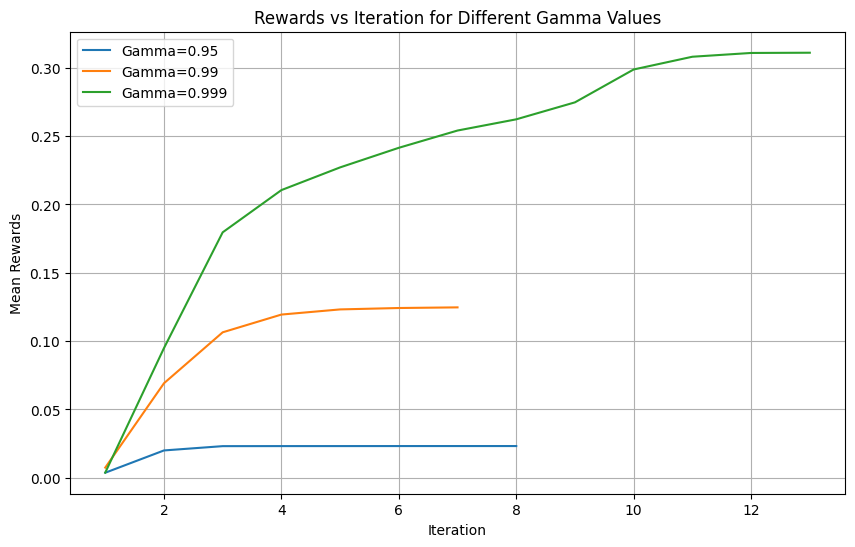

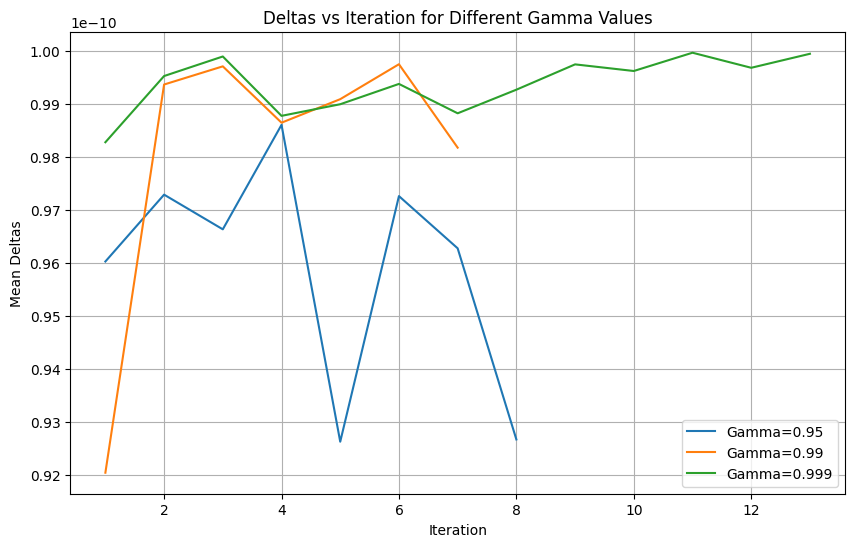

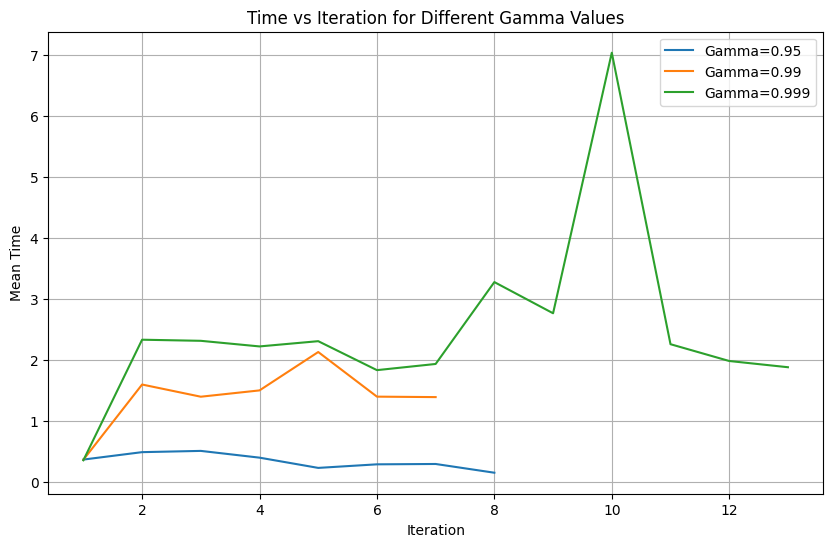

In [8]:
# Plotting
print(gamma_runs)
plt.figure(figsize=(10, 6))
for i, gamma_val in enumerate(gamma_runs):
    iterations = range(1, len(results_dict[gamma_val]['rewards']) + 1)
    mean_rewards = results_dict[gamma_val]['rewards']
    plt.plot(iterations, mean_rewards, label=f'Gamma={gamma_val}')
plt.title('Rewards vs Iteration for Different Gamma Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Rewards')
plt.legend()
plt.grid(True)
plt.show()

# plot delta graph
plt.figure(figsize=(10, 6))
for i, gamma_val in enumerate(gamma_runs):
    iterations = range(1, len(results_dict[gamma_val]['delta']) + 1)
    mean_deltas = results_dict[gamma_val]['delta']
    plt.plot(iterations, mean_deltas, label=f'Gamma={gamma_val}')
plt.title('Deltas vs Iteration for Different Gamma Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Deltas')
plt.legend()
plt.grid(True)
plt.show()


# plot time graph
plt.figure(figsize=(10, 6))
for i, gamma_val in enumerate(gamma_runs):
    iterations = range(1, len(results_dict[gamma_val]['times']) + 1)
    mean_times = results_dict[gamma_val]['times']
    plt.plot(iterations, mean_times, label=f'Gamma={gamma_val}')
plt.title('Time vs Iteration for Different Gamma Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Time')
plt.legend()
plt.grid(True)
plt.show()

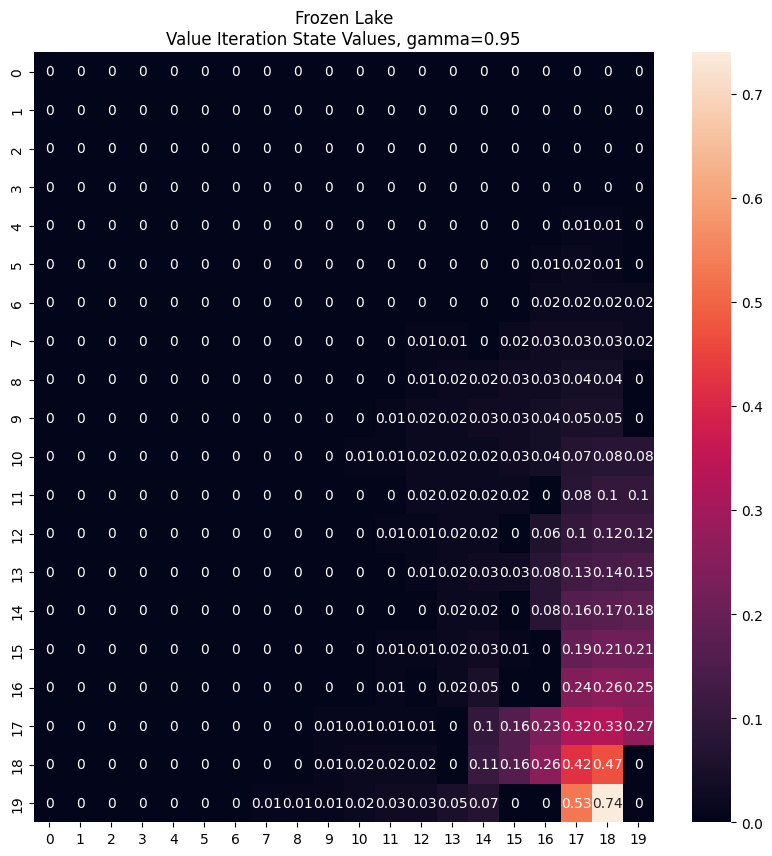

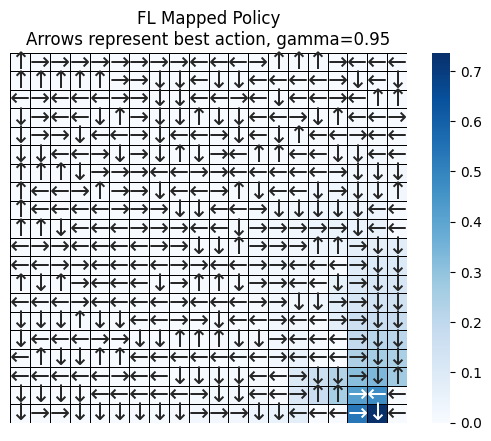

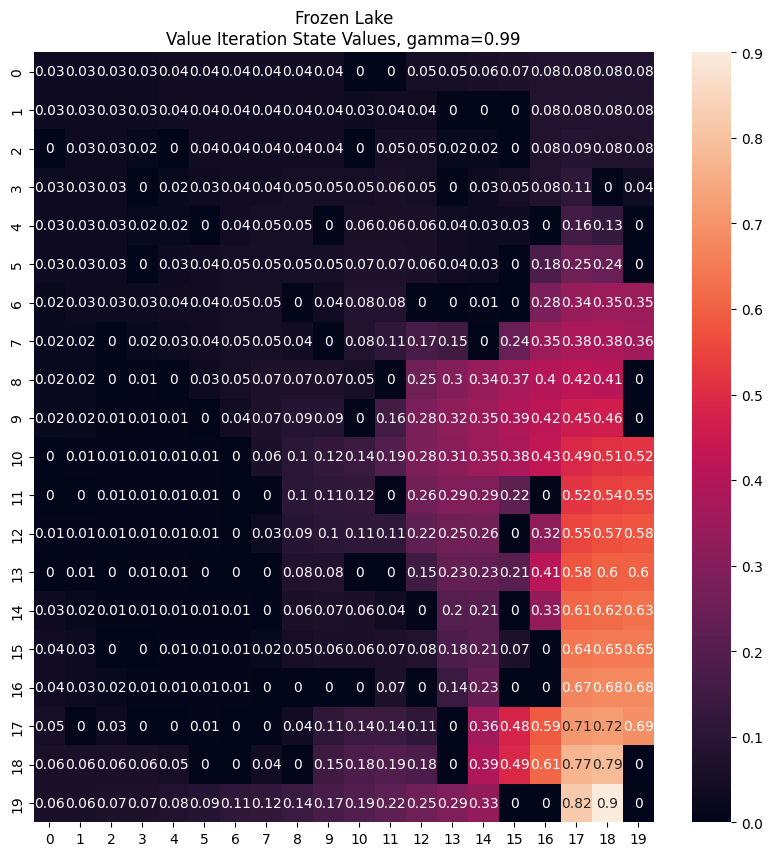

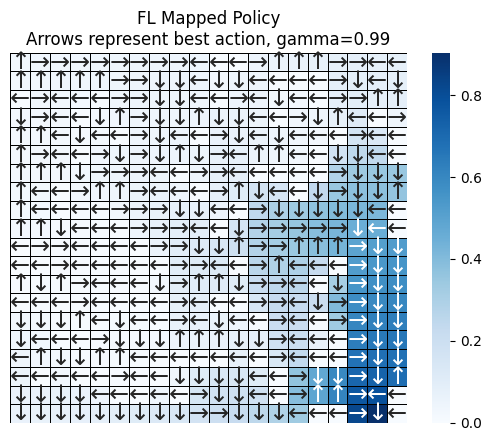

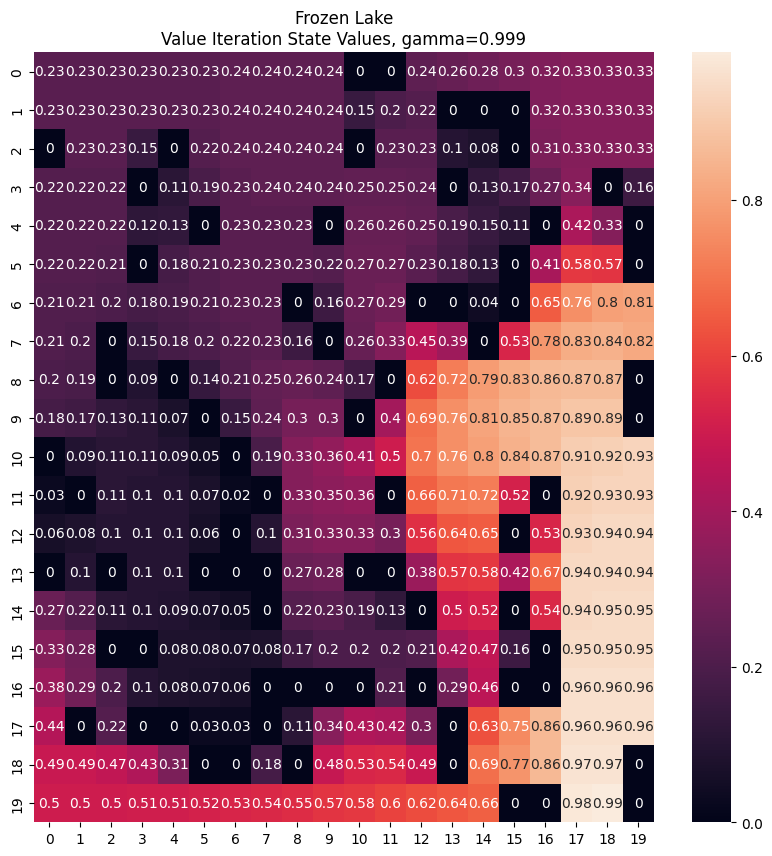

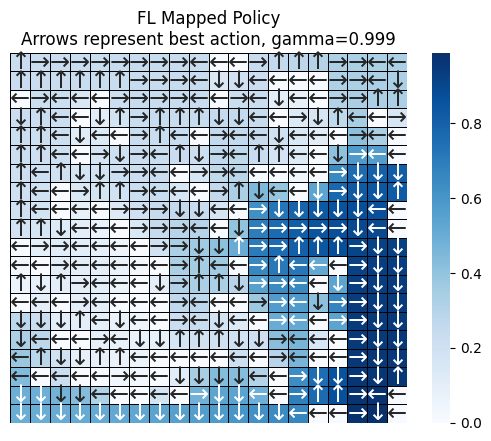

In [10]:
size=(20,20)
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(20,20)
policy_map = {}
policy = 0
val_max = 0

for i, gma in enumerate(gamma_runs):
    V = results_dict[gma]['V']
    Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values, gamma={}".format(gma), size)
    #  Extract and return the optimal policy
    policy = np.zeros(env.observation_space.n, dtype=int)
    for state in range(env.observation_space.n):
        action_values = [sum(prob * (reward + gma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
        policy[state] = np.argmax(action_values)
    title="FL Mapped Policy\nArrows represent best action, gamma={}".format(gma)    
    val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
    Plots.plot_policy(val_max, policy_map, fl_map_size, title)



In [90]:
# QLearning

def q_learning(env, num_episodes=100000, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Initialize Q-table with zeros
    found_it = False
    found_it_iter = 0

    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_by_episode = []
    steps_by_episode = []

    for episode in range(num_episodes):
        state = env.reset()[0]
        total_reward = 0
        num_steps = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state])  # Exploit

            # Take action and observe next state and reward
            next_state, reward, done, trunc, info = env.step(action)

            if reward > 0:
                if not found_it:
                    found_it = True
                    found_it_iter = episode
                    print("Found IT!!!!")

            # Update Q-value using the Q-learning update rule
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            state = next_state
            total_reward += reward
            num_steps += 1

        print(f"Episode {episode + 1} - Reward: {total_reward}, Steps: {num_steps}")
        rewards_by_episode.append(total_reward)
        steps_by_episode.append(num_steps)

    return Q, rewards_by_episode, steps_by_episode, found_it_iter


# Run Q-Learning
Q, rewards_by_episode, steps_by_episode, found_it_iter = q_learning(env)

#  moving avgs
reward_moving_avg_10 = np.convolve(rewards_by_episode, np.ones(10)/10, mode='valid')
reward_moving_avg_50 = np.convolve(rewards_by_episode, np.ones(50)/50, mode='valid')
reward_moving_avg_100 = np.convolve(rewards_by_episode, np.ones(100)/100, mode='valid')
reward_moving_avg_500 = np.convolve(rewards_by_episode, np.ones(500)/500, mode='valid')
reward_moving_avg_1000 = np.convolve(rewards_by_episode, np.ones(1000)/1000, mode='valid')
steps_moving_avg_10 = np.convolve(steps_by_episode, np.ones(10)/10, mode='valid')
steps_moving_avg_50 = np.convolve(steps_by_episode, np.ones(50)/50, mode='valid')
steps_moving_avg_100 = np.convolve(steps_by_episode, np.ones(100)/100, mode='valid')
steps_moving_avg_500 = np.convolve(steps_by_episode, np.ones(500)/500, mode='valid')
steps_moving_avg_1000 = np.convolve(steps_by_episode, np.ones(1000)/1000, mode='valid')


# Extract and return the optimal policy
# policy = np.zeros(env.observation_space.n, dtype=int)
# for state in range(env.observation_space.n):
#     action_values = [sum(prob * (reward + gamma * V[next_state]) for prob, next_state, reward, _ in env.P[state][action]) for action in range(env.action_space.n)]
#     policy[state] = np.argmax(action_values)

# Plot the convergence
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:red'
ax1.set_xlabel('Episode')
ax1.set_ylabel('Steps per Episode', color=color)
# ax1.plot(steps_moving_avg_1000, label='Steps (MA-1000)', color=color)
ax1.plot(steps_moving_avg_500, label='Steps (MA-500)', color=color)
ax1.plot(steps_moving_avg_100, label='Steps (MA-100)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_50, label='Steps (MA-50)', color=color, linestyle='dashed')
# ax1.plot(steps_moving_avg_10, label='Steps (MA-10)', color=color, linestyle='dotted')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Reward per Episode', color=color)
# ax2.plot(reward_moving_avg_1000, label='Reward (MA-1000)', color=color)
ax2.plot(reward_moving_avg_500, label='Reward (MA-500)', color=color)
ax2.plot(reward_moving_avg_100, label='Reward (MA-100)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_50, label='Reward (MA-50)', color=color, linestyle='dashed')
# ax2.plot(reward_moving_avg_10, label='Reward (MA-10)', color=color, linestyle='dotted')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Convergence of Value Iteration Moving Averages (Steps and Reward per Episode)')
plt.show()

# Print the optimal policy
# print("Optimal Policy:")
# print(policy.reshape((8, 8)))
print("Found it in iteration: ", found_it_iter)

# plot state values
# size=(8,8)
# Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

# plot policy
# fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
# fl_map_size=(8,8)
# title="FL Mapped Policy\nArrows represent best action"
# val_max, policy_map = Plots.get_policy_map(Q, V, fl_actions, fl_map_size)
# Plots.plot_policy(val_max, policy_map, fl_map_size, title)

# print(np.array(print_env))


# # Print the optimal policy
# print("Optimal Policy:")
# print(Q.reshape((8, 8)))

# # Print the value function
# print("\nValue Function:")
# print(V.reshape((8, 8)))

Episode 1 - Reward: 0.0, Steps: 9
Episode 2 - Reward: 0.0, Steps: 4
Episode 3 - Reward: 0.0, Steps: 15
Episode 4 - Reward: 0.0, Steps: 2
Episode 5 - Reward: 0.0, Steps: 9
Episode 6 - Reward: 0.0, Steps: 10
Episode 7 - Reward: 0.0, Steps: 7
Episode 8 - Reward: 0.0, Steps: 20
Episode 9 - Reward: 0.0, Steps: 19
Episode 10 - Reward: 0.0, Steps: 7
Episode 11 - Reward: 0.0, Steps: 7
Episode 12 - Reward: 0.0, Steps: 6
Episode 13 - Reward: 0.0, Steps: 6
Episode 14 - Reward: 0.0, Steps: 31
Episode 15 - Reward: 0.0, Steps: 12
Episode 16 - Reward: 0.0, Steps: 32
Episode 17 - Reward: 0.0, Steps: 14
Episode 18 - Reward: 0.0, Steps: 21
Episode 19 - Reward: 0.0, Steps: 8
Episode 20 - Reward: 0.0, Steps: 8
Episode 21 - Reward: 0.0, Steps: 25
Episode 22 - Reward: 0.0, Steps: 14
Episode 23 - Reward: 0.0, Steps: 42
Episode 24 - Reward: 0.0, Steps: 3
Episode 25 - Reward: 0.0, Steps: 7
Episode 26 - Reward: 0.0, Steps: 6
Episode 27 - Reward: 0.0, Steps: 4
Episode 28 - Reward: 0.0, Steps: 6
Episode 29 - Rewa